<h2>Monte Carlo Simulation with Geometric Brownian Motion Model to Predict Future EUR/USD Exchange Rate</h2>

<p>In this notebook, we will be using the Geometric Brownian Motion (GBM) Model to predict the future evolution of the EUR/USD exchange rate. GBM is a stochastic process that is commonly used in financial modeling to simulate the random movement of assets such as stock prices, exchange rates, and commodity prices. It is based on two components: Drift and Volatility.</p>

The following formula shows how today's price is affected by its value yesterday and its return:

$$
Today's Price = Yesterday's Price \cdot e^{r}
$$

Where r is the logarithmic return of today's price with respect to yesterday's price. 

Next, we will use the Geometric Brownian Motion Model to predict the future evolution of the EUR/USD exchange rate. The model uses two components for Monte Carlo simulation: Drift and Volatility.

**Drift:** The direction in which returns have moved in the past, reflects the long-term trend in stock prices.

$$
drift = μ - \frac{1}{2} \cdot σ^2
$$

**Random Variable:** Represents the historical volatility of the evolution of the exchange rate multiplied by the value z of a random number between 0 and 1. The random variable is generated automatically. The Z value represents the probability of an event happening depending on how many standard deviations it deviates from the mean.

$$
Random Variable = σ \cdot Z(Random(0;1))
$$

Using the Greometric Brownian Model, the equation that generates future data for the exchange rate is as follows:

$$
Today's Price = Yesterday's Price \cdot e^{(μ-\frac{1}{2}\cdot σ^2)+σZ(Random(0;1))}
$$

Here, μ represents the expected return and σ represents the standard deviation of returns. 


```


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from scipy.stats import norm
import plotly.express as px

In [2]:
ticker = ['EURUSD=X']

In [3]:
data = yf.download(ticker)['Adj Close']
data

[*********************100%%**********************]  1 of 1 completed


Date
2003-12-01    1.196501
2003-12-02    1.208897
2003-12-03    1.212298
2003-12-04    1.208094
2003-12-05    1.218695
                ...   
2023-11-17    1.085376
2023-11-20    1.090703
2023-11-21    1.094595
2023-11-22    1.091822
2023-11-23    1.090037
Name: Adj Close, Length: 5185, dtype: float64

In [4]:
data.isna().mean()

0.0

**<font >In the dataframe above, we see that we have extracted 4,884 data from "Yahoo Finance", which are daily exchange rates of EUR/USD starting from December 2003 until September 29, 2022 (analysis date).</font>**

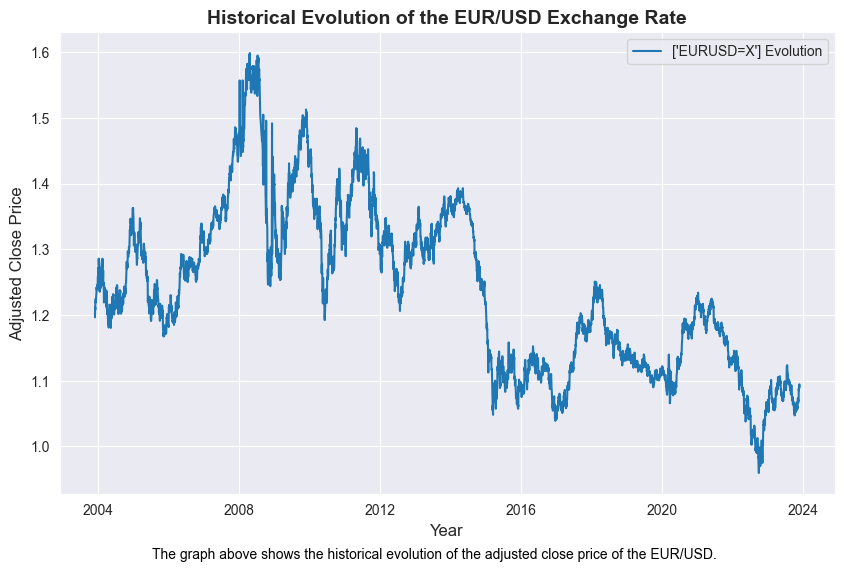

In [5]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.lineplot(data)
plt.legend([f'{ticker} Evolution'])
plt.title('Historical Evolution of the EUR/USD Exchange Rate', fontweight='bold', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Adjusted Close Price', fontsize=12)
plt.figtext(0.5, 0.02, 'The graph above shows the historical evolution of the adjusted close price of the EUR/USD.', ha='center', va='top', fontsize=10, color='black')

plt.show()

In [6]:
log_returns = np.log(1 + data.pct_change())
log_returns

Date
2003-12-01         NaN
2003-12-02    0.010307
2003-12-03    0.002809
2003-12-04   -0.003473
2003-12-05    0.008736
                ...   
2023-11-17   -0.000076
2023-11-20    0.004896
2023-11-21    0.003562
2023-11-22   -0.002536
2023-11-23   -0.001636
Name: Adj Close, Length: 5185, dtype: float64

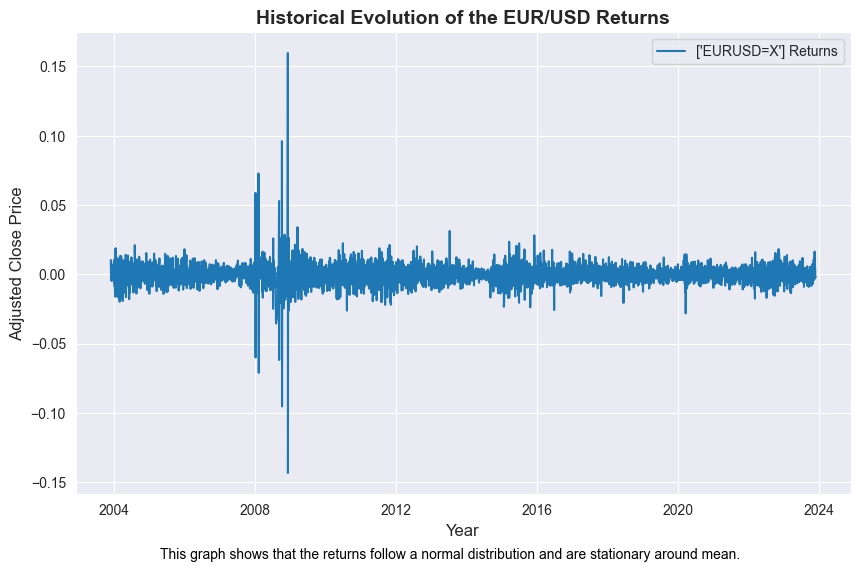

In [7]:
plt.figure(figsize=(10,6))
sns.lineplot(log_returns)
plt.legend([f'{ticker} Returns'])
plt.title('Historical Evolution of the EUR/USD Returns', fontweight='bold', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Adjusted Close Price', fontsize=12)
plt.figtext(0.5, 0.02, 'This graph shows that the returns follow a normal distribution and are stationary around mean.', ha='center', va='top', fontsize=10, color='black')

plt.show()

In [8]:
u = log_returns.mean()
var = log_returns.var()

print(f'Mean: {u:.9f}')
print(f'Variance: {var:.9f}')

Mean: -0.000017976
Variance: 0.000051569


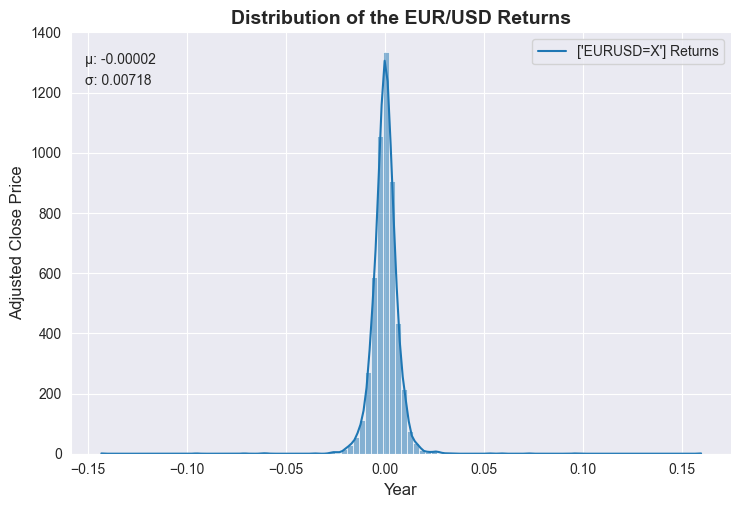

In [9]:
sns.displot(log_returns, bins=100, aspect=1.5,kde=True)
plt.legend([f'{ticker} Returns'])
plt.title('Distribution of the EUR/USD Returns', fontweight='bold', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Adjusted Close Price', fontsize=12)

mean_text = f'μ: {u:.5f}'
std_dev_text = f'σ: {var**.5:.5f}'

plt.text(0.02, 0.95, mean_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.text(0.02, 0.90, std_dev_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show()


### <u>*Drift*<u>

$$
drift = μ - \frac{1}{2} \cdot σ^2
$$

In [10]:
drift = u - (.5 * var)
print(f'Drift: {drift:.9f}')

Drift: -0.000043761


### <u>*Random Variable*<u>

$$
Random Variable = σ \cdot Z(Random(0;1))
$$
<br />

In [11]:
t_intervals = 100
iterations = 1000

In [12]:
stdev = log_returns.std()
print(f'σ: {stdev:.9f}')

σ: 0.007181128


In [13]:
z = norm.ppf(np.random.rand(t_intervals, iterations))
z.shape

(100, 1000)

### <u>*Daily Returns*<u>

$$
daily\_returns = e^{r}
$$

$$
r = drift + stdev \cdot z
$$

In [14]:
daily_returns = np.exp(drift + stdev * z)

In [15]:
daily_returns

array([[1.0016236 , 0.99937066, 1.00238064, ..., 0.99103911, 1.00957301,
        0.99743187],
       [1.00094847, 1.00181274, 1.01488186, ..., 1.00896387, 1.00575214,
        1.00409682],
       [1.00517067, 0.98845581, 1.01677218, ..., 1.01424049, 0.9968032 ,
        0.99822259],
       ...,
       [0.9963049 , 1.00066494, 0.99680288, ..., 1.00001979, 0.99816516,
        1.00631119],
       [0.99062438, 0.99279918, 1.00077437, ..., 0.9942943 , 1.0045849 ,
        1.00340573],
       [0.99537247, 0.98987813, 1.00251505, ..., 1.01795859, 0.99963851,
        1.007227  ]])

### <u>*Future Prices*<u>

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$

<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$

In [16]:
S0 = data.iloc[-1:]
S0

Date
2023-11-23    1.090037
Name: Adj Close, dtype: float64

In [17]:
price_list = np.zeros_like(daily_returns)
price_list.shape
price_list[0] = S0

In [18]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [19]:
price_list

array([[1.09003711, 1.09003711, 1.09003711, ..., 1.09003711, 1.09003711,
        1.09003711],
       [1.09107097, 1.09201306, 1.10625889, ..., 1.09980806, 1.09630715,
        1.0945028 ],
       [1.09671253, 1.07940665, 1.12481326, ..., 1.11546987, 1.09280248,
        1.09255742],
       ...,
       [1.11775865, 1.08124282, 1.24336607, ..., 1.34031647, 1.07198587,
        1.04373293],
       [1.10727897, 1.07345698, 1.2443289 , ..., 1.33266902, 1.07690082,
        1.0472876 ],
       [1.102155  , 1.0625916 , 1.24745845, ..., 1.35660188, 1.07651153,
        1.05485634]])

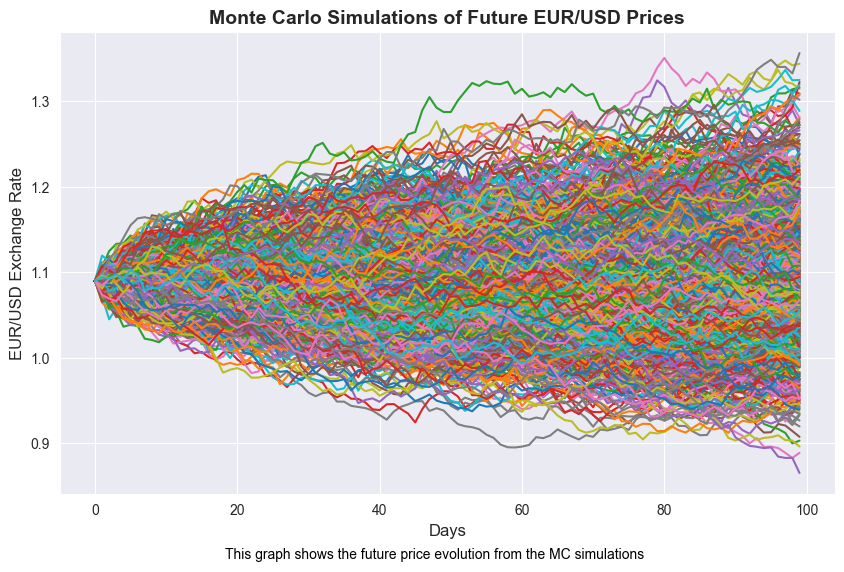

In [20]:
plt.figure(figsize=(10,6))
plt.plot(price_list)

plt.title('Monte Carlo Simulations of Future EUR/USD Prices', fontweight='bold', fontsize=14)
plt.xlabel('Days', fontsize=12)
plt.ylabel('EUR/USD Exchange Rate', fontsize=12)
plt.figtext(0.5, 0.02, 'This graph shows the future price evolution from the MC simulations', ha='center', va='top', fontsize=10, color='black')

plt.show()

### <u>*Distribution*<u>

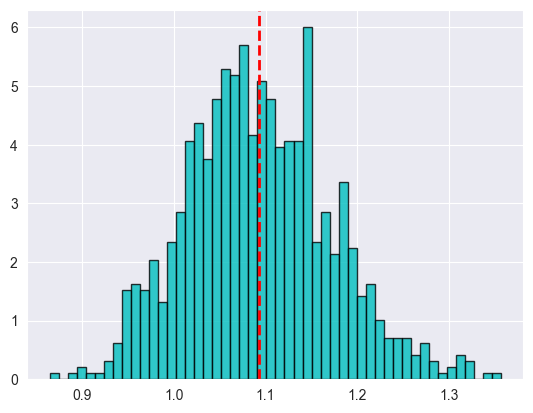

In [21]:
plt.hist(pd.Series(price_list[-1]),bins=50,density=True,histtype='barstacked',color='c', edgecolor='k', alpha=0.8)
plt.axvline(pd.Series(price_list[-1]).mean(), color='red', linestyle='dashed', linewidth=2)
plt.show()